<div class="alert alert-info"> <b>Проект: Статистический анализ данных</b>.
    

    Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
    Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.
    
    Сервисом можно пользоваться:
    без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
    
    с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

    Описание данных:
    
    Пользователи — users_go.csv
    'user_id'	- уникальный идентификатор пользователя
    'name' - имя пользователя
    'age' - возраст
    'city' - город
    'subscription_type' - тип подписки (free, ultra)
    
    Поездки — rides_go.csv
    'user_id' - уникальный идентификатор пользователя
    'distance' - расстояние, которое пользователь проехал в текущей сессии (в метрах)
    'duration' - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
    'date' - дата совершения поездки
    
    Подписки — subscriptions_go.csv
    'subscription_type' - тип подписки
    'minute_price' - стоимость одной минуты поездки по данной подписке
    'start_ride_price' - стоимость начала поездки
    'subscription_fee' - стоимость ежемесячного платежа
    
    Цель исследования: подсчитать выручку и проверить гипотезы.
</div>

**План работы:**

    - Загрузка данных.
        - Считываем данные из csv-файлов в датафреймы и сохраним в переменные dt_users, dt_rides, dt_sub..
        - Выведем первые 20 строк датасетов dt_users, dt_rides, dt_sub. и информацию о них.
    - Предобработка данных.
        - Приведём столбец date к типу даты pandas.
        - Создадим новый столбец с номером месяца на основе столбца date.
        - Проверим наличие пропущенных значений и дубликатов в датафреймах.
        - Удалим явные дубликаты.
    - Исследовательский анализ данных.
        - Опишем и визуализируем общую информацию о пользователях и поездках.
        - Рассмотрим частоту встречаемости городов.
        - Рассмотрим соотношение пользователей с подпиской и без подписки.
        - Рассмотрим возраст пользователей.
        - Рассмотрим расстояние, которое пользователь преодолевает за одну поездку.
        - Рассмотрим продолжительность поездок.
    - Объединение данных.
        - Объединим данные о пользователях, поездках и подписках в один датафрейм.
        - Создадим ещё два датафрейма c данными о пользователях без подписки; с данными о пользователях с подпиской.
        - Визуализируем информацию о расстоянии.
        - Визуализируем информацию о времени поездок.
    - Подсчёт выручки.
        - Создадим датафрейм с агрегированными данными о поездках.
        - Добавим столбец с помесячной выручкой, которую принёс каждый пользователь.
    - Проверка гипотез
        - Проверим гипотезу: Тратят ли пользователи с подпиской больше времени на поездки?
        - Проверим гипотезу: Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну       поездку, не превышает 3130 метров?
        - Проверьте гипотезу: Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
        - Дадим ответ на вопрос: Какой тест вам понадобился бы для проверки этой гипотезы?



In [1]:
#Импортируем библиотеку pandas
import pandas as pd
#Импортируем библиотеку matplotlib
import matplotlib.pyplot as plt
#Импортируем библиотеку numpy
import numpy as np
#Импортируем метод stats из библиотеки scipy
from scipy import stats as st

#### Шаг 1. Загрузка данных

**Считываем данные из csv-файлов в датафреймы и сохраним в переменные dt_users, dt_rides, dt_sub.**

In [2]:
#Сохраним данные из датасетов в переменные
dt_users = pd.read_csv('/datasets/users_go.csv')

dt_rides = pd.read_csv('/datasets/rides_go.csv')

dt_sub = pd.read_csv('/datasets/subscriptions_go.csv')

**Выведем первые 20 строк датасета dt_users и информацию о нём.**

In [3]:
dt_users#Сделаем обзор датасета data_users
display(dt_users.info())
dt_users.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


**Выведем первые 20 строк датасета dt_rides и информацию о нём.**

In [4]:
#Сделаем обзор датасета data_rides
display(dt_rides.info())
dt_rides.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


**Выведем первые 20 строк датасета dt_sub и информацию о нём.**

In [5]:
#Сделаем обзор датасета data_sub
display(dt_sub.info())
dt_sub.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Сделаем выводы по обзору данных:**
 - В датасетах не обнаружено пропусков.
 - Все датасеты разных размеров.
 

#### Шаг 2. Предобработка данных

**Приведём столбец date к типу даты pandas.**

In [6]:
dt_rides['date'] = pd.to_datetime(dt_rides['date'], format='%Y-%m-%d')

**Создадим новый столбец с номером месяца на основе столбца date.**

In [7]:
dt_rides['month'] = dt_rides['date'].dt.month
#Выведем обновленный датасет
display(dt_rides.head(10))
display(dt_rides['date'].min())
dt_rides['date'].max()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


Timestamp('2021-01-01 00:00:00')

Timestamp('2021-12-30 00:00:00')

**Проверим наличие пропущенных значений и дубликатов в датафреймах.**

In [8]:
#Проверим наличие явных дубликатов в датасете data_users
dt_users.duplicated().sum()

31

In [9]:
#Проверим наличие явных дубликатов в датасете data_rides
dt_rides.duplicated().sum()

0

In [10]:
#Проверим наличие явных дубликатов в датасете data_sub
dt_sub.duplicated().sum()

0

In [11]:
#Проверим наличие пропущенных значений в датасете data_users
dt_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [12]:
#Проверим наличие пропущенных значений в датасете data_rides
dt_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

**Мы обнаружили явные дубликаты в датасете dt_users. Удалим их.**

In [13]:
dt_users = dt_users.drop_duplicates()
#Проверим остались ли дубликаты
dt_users.duplicated().sum()

0

**Пропущенных значений в датасетах не обнаружено.**

#### Шаг 3. Исследовательский анализ данных

**Опишем и визуализируем общую информацию о пользователях и поездках.**

**Рассмотрим частоту встречаемости городов.**

In [14]:
#Выведем частоту встречаемости городов в виде таблицы
dt_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

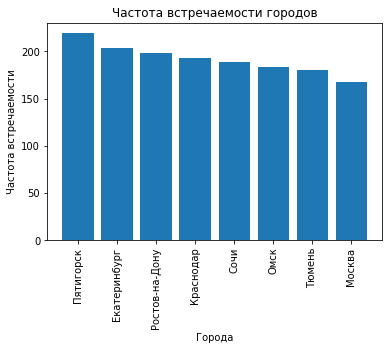

In [15]:
#Построим график частоты встречаемости городов
x_bar = ['Пятигорск', 'Екатеринбург', 'Ростов-на-Дону', 'Краснодар', 'Сочи', 'Омск', 'Тюмень', 'Москва']
y_bar = dt_users['city'].value_counts()
plt.bar(x_bar, y_bar)

plt.title('Частота встречаемости городов')
plt.xlabel('Города')
plt.ylabel('Частота встречаемости')
plt.xticks(rotation=90);

**Вывод:** Наиболее часто встречаемый в датасете город это Пятигорск. Наименее встречаемый город - Москва. Разность в частоте встречаемости не более 25%.

**Рассмотрим соотношение пользователей с подпиской и без подписки.**

In [16]:
#Посчитаем количество людей с подпиской и без
dt_users_subscription_type = dt_users['subscription_type'].value_counts()
dt_users_subscription_type

free     835
ultra    699
Name: subscription_type, dtype: int64

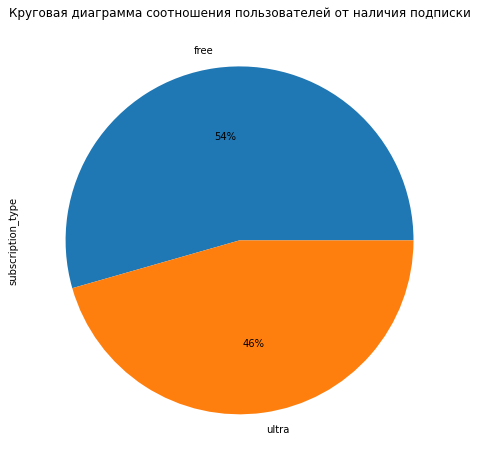

In [17]:
#Построим круговую диаграмму для наглядности
dt_users_subscription_type.plot(kind = 'pie', y = dt_users_subscription_type, autopct='%1.0f%%', figsize=(8, 8))
plt.title('Круговая диаграмма соотношения пользователей от наличия подписки');

**Вывод:** На диаграмме видно, что большая часть людей (54%) не пользуется платной подпиской. При это процент пользоватилей с подпиской не сильно ниже (всего на 8%).

**Рассмотрим возраст пользователей.**

In [18]:
#Рассмотрим все возраста в датасете
dt_users['age'].sort_values().unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 43])

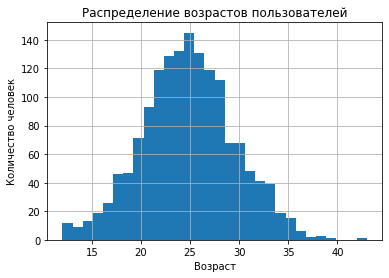

In [19]:
#Построим график распределения возрастов
dt_users['age'].plot(kind='hist', bins=30, grid=True)
plt.title('Распределение возрастов пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество человек');

**Вывод:** Как видно, график имеет распределение близкое к нормальному. Среднее и наиболее частое значение, это 25 лет. Старшим можно считать возраст выше 35 лет. Младшим - ниже 15 лет.

**Рассмотрим расстояние, которое пользователь преодолевает за одну поездку.**

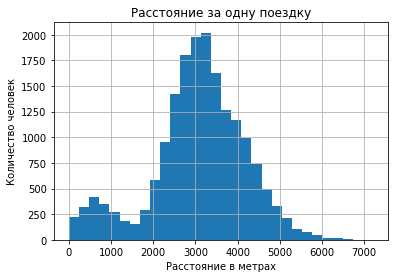

In [20]:
#Построим график расстояния за одну поездку
dt_rides['distance'].plot(kind='hist', bins=30, grid=True)
plt.title('Расстояние за одну поездку')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество человек');

In [21]:
#Посмотрим на квартили поездок
dt_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

**Вывод:** Медианным растоянием за поездку можно считать значение в 3133 метра. Небольшим расстоянием можно считать 2543 метра. Большим можно считать расстояние выше 3776 метров. Максимальное расстояние 7211 метра. При этом довольно много поездок с расстоянием около 0.

**Рассмотрим продолжительность поездок.**

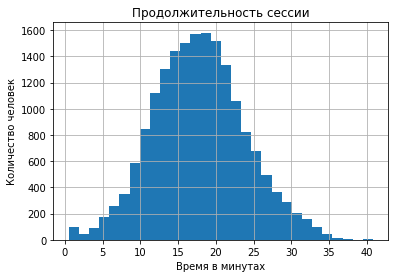

In [22]:
#Построим график продолжительности поездок
dt_rides['duration'].plot(kind='hist', bins=30, grid=True)
plt.title('Продолжительность сессии')
plt.xlabel('Время в минутах')
plt.ylabel('Количество человек');

In [23]:
#Посмотрим на квартили времени заездов
dt_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

**Вывод:** Распределение времени поездок близко к нормальному. Медианным временем поездки можно считать 17 минут. Быстрой поездкой можно считать поездку менее 13 минут. Долгой можно считать поездку более 21 минуты. Максимальное время поездки более 40 минут. Минимальное - 0.5 минуты.

#### Шаг 4. Объединение данных

**Объединим данные о пользователях, поездках и подписках в один датафрейм.**

<div class="alert alert-info">Проверим размерность датасетов и размерность результирующего датафрейма.</div>

In [24]:
print('Размерность датасета dt_users:', dt_users.shape)
print('Размерность датасета dt_users:', dt_rides.shape)
print('Размерность датасета dt_users:', dt_sub.shape)

Размерность датасета dt_users: (1534, 5)
Размерность датасета dt_users: (18068, 5)
Размерность датасета dt_users: (2, 4)


In [25]:
#Объединим три датасета в один
table_union = dt_users.merge(dt_rides)
table_union = table_union.merge(dt_sub)

#Проверим размерность результирующего датасета
print('Размерность датафрейма table_union:', table_union.shape)

#Выведем полученную таблицу
table_union

Размерность датафрейма table_union: (18068, 12)


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


**Создадим ещё два датафрейма c данными о пользователях без подписки; с данными о пользователях с подпиской.**

In [26]:
#Создадим датафрейм с данными о людях без подписки
dt_free = table_union[table_union['subscription_type'] == 'free']
dt_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [27]:
#Создадим датафрейм с данными о людях с подпиской
dt_ultra = table_union[table_union['subscription_type'] == 'ultra']
dt_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


**Визуализируем информацию о расстоянии.**

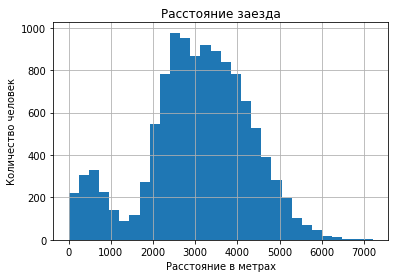

In [28]:
#Построим график расстояния пройденного за одну поездку для людей без подписки
dt_free['distance'].plot(kind='hist', bins=30, grid=True)
plt.title('Расстояние заезда')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество человек');

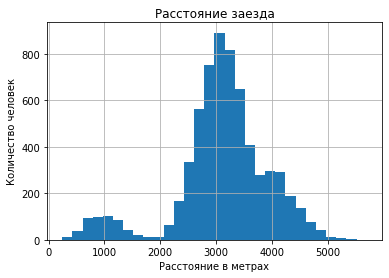

In [29]:
#Построим график расстояния пройденного за одну поездку для людей с подпиской
dt_ultra['distance'].plot(kind='hist', bins=30, grid=True)
plt.title('Расстояние заезда')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество человек');

**Вывод:** На обоих графиках заметны два пика. Люди без подписки часто проезжают большие расстояния, чем люди с подпиской (есть значения более 7000 метров). При этом меньший пик для людей без подписки находится около значения в 500 метров, а для людей с подпиской - около 1000 метров.

**Визуализируем информацию о времени поездок.**

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

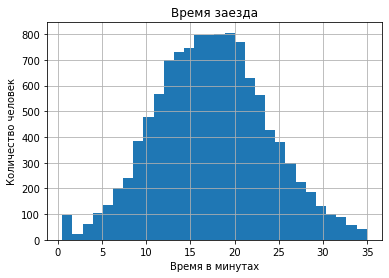

In [30]:
#Построим график времени для одной поездки для людей без подписки
dt_free['duration'].plot(kind='hist', bins=30, grid=True)
plt.title('Время заезда')
plt.xlabel('Время в минутах')
plt.ylabel('Количество человек')
dt_free['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

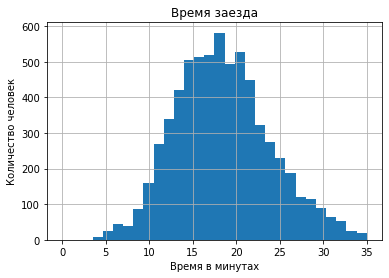

In [31]:
#Построим график времени для одной поездки для людей без подписки
dt_ultra['duration'].plot(kind='hist', bins=30, grid=True, range = (0, 35))
plt.title('Время заезда')
plt.xlabel('Время в минутах')
plt.ylabel('Количество человек')
dt_ultra['duration'].describe()

**Вывод:** Графики для времени заездов для людей с подпиской и без практически идентичны. Графики близки к нормальному распределению. При этом среднее время немного отличается для двух групп людей: для людей без подписки оно равно 17.5 минутам, а для людей с подпиской - 18.5 минутам. Можно сделать вывод, что люди с подпиской совершают более длительные заезды.

#### Шаг 5. Подсчёт выручки

**Создадим датафрейм с агрегированными данными о поездках.**

<div class="alert alert-info">Проверим на пропуски в сводную таблицу перед расчетом выручки.</div>

In [32]:
#Выведем сумму всех пропусков таблицы table_union по всем столбцам
table_union.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [33]:
#Округлим каждое значение из столбца duration до целого в большую сторону
table_union['duration'] = np.ceil(table_union['duration'])

In [34]:
#Создадим сводную таблицу
dt_agg = pd.pivot_table(table_union, index=['user_id', 'month'], values = ['distance', 'name', 'duration', 'subscription_type'], aggfunc = {'distance': sum, 'name' : len, 'duration' : sum, 'subscription_type': max})
dt_agg.columns = ['distance', 'duration', 'number_of_trips', 'subscription_type']

dt_agg

distance  duration  number_of_trips subscription_type
user_id month                                                           
1       1       7027.511294      42.0                2             ultra
        4        754.159807       7.0                1             ultra
        8       6723.470560      46.0                2             ultra
        10      5809.911100      32.0                2             ultra
        11      7003.499363      56.0                3             ultra
...                     ...       ...              ...               ...
1534    6       3409.468534      26.0                2              free
        8       7622.453034      48.0                2              free
        9       4928.173852      23.0                1              free
        11     13350.015305      78.0                4              free
        12      2371.711192      16.0                1              free

[11331 rows x 4 columns]

**Добавим столбец с помесячной выручкой, которую принёс каждый пользователь.**

In [35]:
def monthly_revenue(row):
    if row['subscription_type'] == 'free':
        return 50 * row['number_of_trips'] +  8 * row['duration']
    elif row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    else:
        return 0
    
dt_agg['monthly_revenue'] = dt_agg.apply(monthly_revenue, axis=1)
dt_agg

distance  duration  number_of_trips subscription_type  \
user_id month                                                              
1       1       7027.511294      42.0                2             ultra   
        4        754.159807       7.0                1             ultra   
        8       6723.470560      46.0                2             ultra   
        10      5809.911100      32.0                2             ultra   
        11      7003.499363      56.0                3             ultra   
...                     ...       ...              ...               ...   
1534    6       3409.468534      26.0                2              free   
        8       7622.453034      48.0                2              free   
        9       4928.173852      23.0                1              free   
        11     13350.015305      78.0                4              free   
        12      2371.711192      16.0                1              free   

               monthly_revenue  
user_id month                   
1       1                451.0  
        4                241.0  
        8                475.0  
        10               391.0  
        11               535.0  
...                        ...  
1534    6                308.0  
        8                484.0  
        9                234.0  
        11               824.0  
        12               178.0  

[11331 rows x 5 columns]

**Вывод:** Мы создали датафрейм с агрегированными данными о поездках и добавили столбец с помесячной выручкой, которую принёс каждый пользователь.

#### Шаг 6. Проверка гипотез

**6.1 Проверим гипотезу: Тратят ли пользователи с подпиской больше времени на поездки?**

Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза: H_0: Время поездки для людей с подпиской равно времени поездки для людей без подписки.

Альтернативная гипотеза: H_1: Время поездки для людей с подпиской больше времени поездки для людей без подписки.

In [36]:
#Подготовим данные
ultra_sub = dt_ultra['duration'] 
free_sub = dt_free['duration']
alpha = 0.05
#Проведем T-test
results = st.ttest_ind(ultra_sub, free_sub, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:** Время поездки для людей с подпиской больше времени поездки для людей без подписки.

**6.2 Проверим гипотезу: Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**

Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза: H_0: Расстояние за один заезд пользователей с подпиской равно 3130 метров.

Альтернативная гипотеза: H_1: Расстояние за один заезд пользователей с подпиской больше 3130 метров.

In [37]:
#Подготовим данные
ultra_distance = dt_ultra['distance']
star_meaning = 3130.0
alpha = .05
#Проведем T-test
results = st.ttest_1samp(ultra_distance, star_meaning, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


**Вывод:** Нельзя сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

**6.3 Проверьте гипотезу: Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?**

Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза: H_0: Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.

Альтернативная гипотеза: H_1: Помесячная выручка от пользователей с подпиской по месяцам больше выручки от пользователей без подписки.

In [38]:
#Подготовим данные
dt_agg_ultra = dt_agg.loc[dt_agg['subscription_type'] == 'ultra', 'monthly_revenue']
dt_agg_free = dt_agg.loc[dt_agg['subscription_type'] == 'free', 'monthly_revenue']
alpha = .05
#Проведем T-test
results = st.ttest_ind(dt_agg_ultra, dt_agg_free, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод:** Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

**Вывод:** Здесь нужно использовать левосторонний тест о равенстве средних значений для зависимых выборок.

Нулевая гипотеза: H_0: mu1 == mu2

Альтернативная гипотеза: H_1: mu1 > mu2

Так как выборка происходила по одним и тем же людям, метод, который будем использовать - **st.ttest_rel()**



**ОБЩИЙ ВЫВОД**

**Выводы по работе: Исследовательский анализ данных**

    - Наиболее часто встречаемый в датасете город это Пятигорск. Наименее встречаемый город - Москва.
    - На диаграмме видно, что большая часть людей (54%) не пользуется платной подпиской.
    - Как видно, график имеет распределение близкое к нормальному. Среднее и наиболее частое значение, это 25 лет. Старшим можно считать возраст выше 35 лет. Младшим - ниже 15 лет.
    - Медианным растоянием за поездку можно считать значение в 3133 метра. Небольшим расстоянием можно считать 2543 метра. Большим можно считать расстояние выше 3776 метров. Максимальное расстояние 7211 метра. При этом довольно много поездок с расстоянием около 0.
    - Распределение времени поездок близко к нормальному. Медианным временем поездки можно считать 17 минут. Быстрой поездкой можно считать поездку менее 13 минут. Долгой можно считать поездку более 21 минуты. Максимальное время поездки более 40 минут. Минимальное - 0.5 минуты.
    
**Выводы по работе: Объединение данных**

    - На обоих графиках заметны два пика. Люди без подписки часто проезжают большие расстояния, чем люди с подпиской (есть значения более 7000 метров).
    - Графики близки к нормальному распределению. При этом среднее время немного отличается для двух групп людей: для людей без подписки оно равно 17.5 минутам, а для людей с подпиской - 18.5 минутам. Можно сделать вывод, что люди с подпиской совершают более длительные заезды.
    
**Выводы по гипотезам**

    - Время поездки для людей с подпиской больше времени поездки для людей без подписки.
    - Нельзя сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.
    - Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
    - Так как выборка происходила по одним и тем же людям, метод, который будем использовать - st.ttest_rel()
    
**Рекомендации по развитию аренды самокатов:**

    - Продвигать свою подписку т.к. пользователи с подпиской в среднем приносят больше денег.
    - Продвигать самокаты среди возрастной группы в 25 лет, т.к. пользователей этой возрастной группы больше всего.
    - Делать стоянки для самокатов на расстоянии 3130 метров т.к. это оптимальное расстояние для расхода ресурса самоката. 
